In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
#df=pd.read_csv("Building_and_Safety_Permit_Information.csv",low_memory=False)
df2=pd.read_csv("Building_Permits.csv",low_memory=False)

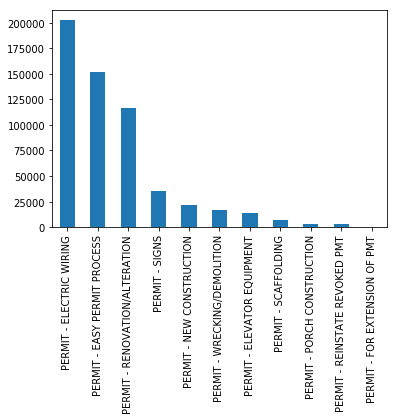

In [17]:
df2["  PERMIT_TYPE"].value_counts().plot(kind="bar")
plt.show()

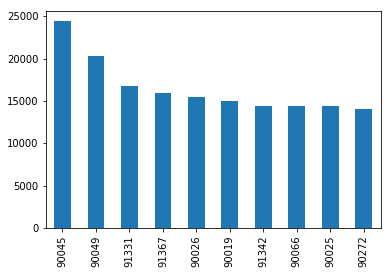

In [150]:
df["Zip Code"]=df["Zip Code"].fillna(0).astype(int)
df["Zip Code"].value_counts().head(10).plot(kind="bar")
plt.show()

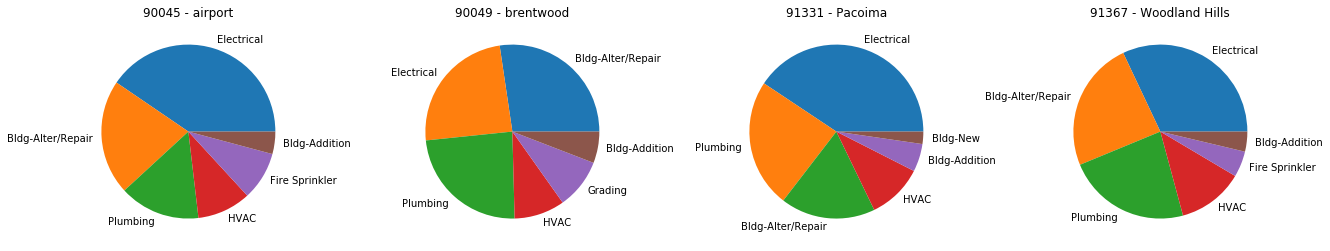

In [86]:
fig, [ax1,ax2,ax3,ax4] = plt.subplots(ncols=4)

df[df["Zip Code"]==90045]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax1,title="90045 - airport")
df[df["Zip Code"]==90049]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax2,title="90049 - brentwood")
df[df["Zip Code"]==91331]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax3,title="91331 - Pacoima")
df[df["Zip Code"]==91367]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax4,title="91367 - Woodland Hills")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)
ax4.set_aspect(1)
plt.subplots_adjust(right=3)


In [73]:
rent=pd.read_csv("LA_rent_index.csv")
rent.head()

,"Los Angeles, CA Zillow Rent Index - All Homes",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,Region Name,Region Type,Data Type,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,...,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018
1,Los Angeles,city,All Homes,"$2,270","$2,257","$2,254","$2,253","$2,250","$2,251","$2,253",...,"$2,960","$2,970","$2,977","$2,980","$2,980","$2,979","$2,979","$2,985","$3,010","$3,043"
2,Arleta,neighborhood,All Homes,"$1,998","$1,998","$1,999","$2,000","$2,000","$1,997","$1,998",...,"$2,579","$2,612","$2,640","$2,648","$2,649","$2,651","$2,658","$2,669","$2,698","$2,730"
3,Atwater Village,neighborhood,All Homes,"$2,328","$2,336","$2,329","$2,318","$2,314","$2,311","$2,309",...,"$3,065","$3,027","$2,999","$2,989","$2,988","$2,987","$2,991","$3,004","$3,075","$3,158"
4,Bel Air,neighborhood,All Homes,"$8,710","$8,738","$8,751","$8,743","$8,731","$8,720","$8,719",...,"$12,027","$12,072","$12,113","$12,118","$12,124","$12,124","$12,117","$12,124","$12,274","$12,502"


In [7]:
rent2=pd.read_csv("chicago.csv")
rent2.head()

,"Chicago, IL Zillow Rent Index - All Homes",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,Region Name,Region Type,Data Type,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,...,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019
1,Chicago,city,All Homes,"$1,592","$1,580","$1,557","$1,538","$1,523","$1,515","$1,510",...,"$1,622","$1,617","$1,612","$1,609","$1,606","$1,612","$1,639","$1,668","$1,690","$1,691"
2,Albany Park,neighborhood,All Homes,"$1,588","$1,575","$1,552","$1,536","$1,523","$1,514","$1,508",...,"$1,686","$1,680","$1,675","$1,671","$1,669","$1,674","$1,698","$1,723","$1,741","$1,739"
3,Andersonville,neighborhood,All Homes,"$1,712","$1,713","$1,691","$1,660","$1,634","$1,621","$1,613",...,"$1,928","$1,923","$1,922","$1,919","$1,913","$1,911","$1,925","$1,937","$1,943","$1,940"
4,Arcadia Terrace,neighborhood,All Homes,"$1,704","$1,703","$1,679","$1,640","$1,606","$1,583","$1,562",...,"$1,887","$1,888","$1,888","$1,884","$1,880","$1,881","$1,904","$1,929","$1,948","$1,946"


In [9]:
CHI_rent_train=[]
for i in range(29,101):
    CHI_rent_train.append(int(''.join(c for c in rent2.iloc[1][i] if c.isdigit())))

In [8]:
df2["         ISSUE_DATE"]=pd.to_datetime(df2["         ISSUE_DATE"])

In [96]:
permit_type2=df2["  PERMIT_TYPE"].unique()
permit_train2=[]

for year in range(2013,2019):
    for month in range(1,13):
        if month!=12:
            temp=df2[(df2["         ISSUE_DATE"]>=datetime(year,month,1)) & (df2["         ISSUE_DATE"]<datetime(year,month+1,1))]["  PERMIT_TYPE"].value_counts()
        else:
            temp=df2[(df2["         ISSUE_DATE"]>=datetime(year,month,1)) & (df2["         ISSUE_DATE"]<datetime(year+1,1,1))]["  PERMIT_TYPE"].value_counts()
        row=[]
        for permit in permit_type2:
            if permit in temp:
                row.append(temp[permit])
            else:
                row.append(0)
        permit_train2.append(row)
        
temp=df2[(df2["         ISSUE_DATE"]>=datetime(2019,1,1)) & (df2["         ISSUE_DATE"]<datetime(2019,2,1))]["  PERMIT_TYPE"].value_counts()
permit_JAN2019_2=[]
for permit in permit_type2:
    if permit in temp:
        permit_JAN2019_2.append(temp[permit])
    else:
        permit_JAN2019_2.append(0)
        
temp=df2[(df2["         ISSUE_DATE"]>=datetime(2019,2,1)) & (df2["         ISSUE_DATE"]<datetime(2019,3,1))]["  PERMIT_TYPE"].value_counts()
permit_FEB2019_2=[]
for permit in permit_type2:
    if permit in temp:
        permit_FEB2019_2.append(temp[permit])
    else:
        permit_FEB2019_2.append(0)



In [81]:
reg = Ridge()
reg.fit(permit_train2, CHI_rent_train)
reg.score(permit_train2, CHI_rent_train)

0.29674017962603827

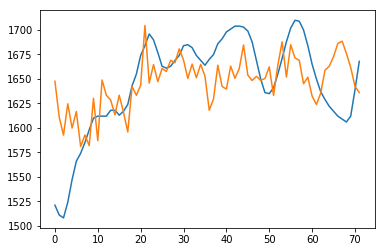

In [82]:
fig, ax = plt.subplots()
fig = plt.plot(CHI_rent_train)
fig = plt.plot(reg.predict(permit_train2))
plt.show()

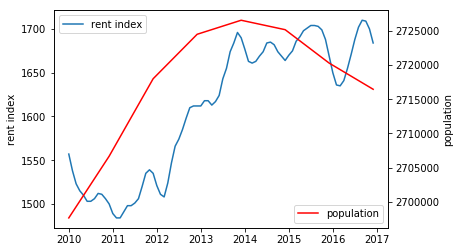

In [132]:
population = [2697661, 2706670, 2717989, 2724482, 2726533, 2725154, 2720275, 2716450]
x = [0, 11, 23, 35, 47, 59, 71, 83]
rent_2010_2017 = []
for i in range(5,89):
    rent_2010_2017.append(int(''.join(c for c in rent2.iloc[1][i] if c.isdigit())))

fig, ax = plt.subplots()
ax.plot(rent_2010_2017)
ax.set_ylabel('rent index')
ax.legend(['rent index'],loc=2)
ax2 = ax.twinx()
ax2.plot(x,population, color = 'r')
ax2.set_ylabel('population')
ax2.tick_params(axis='y')
ax2.legend(['population'],loc=4)
plt.xticks(range(0,85,12), ['2010', '2011', '2012', '2013', '2014' , '2015' , '2016', '2017'])
plt.show()

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import base

class residual(base.BaseEstimator, base.RegressorMixin):

    def __init__(self):
        self.base = Ridge()
        self.residual = RandomForestRegressor(max_depth = 10, n_estimators = 100)

    def fit(self, X, y=None):
        self.base = self.base.fit(X, y)
        self.residual = self.residual.fit(X, y - (self.base.predict(X)))
        return self

    def predict(self, X):
        return (self.base.predict(X))+(self.residual.predict(X))

In [77]:
from sklearn.pipeline import Pipeline
est = Pipeline([
    ('res', residual())    
    ])
est.fit(permit_train2, CHI_rent_train)

Pipeline(memory=None, steps=[('res', residual())])

In [78]:
est.score(permit_train2, CHI_rent_train)

0.8801702150847959

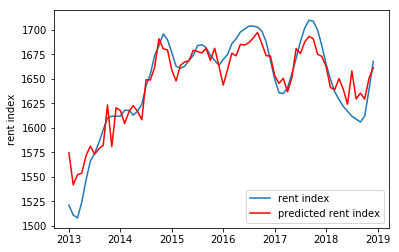

In [138]:

fig, ax = plt.subplots()
ax.set_ylabel('rent index')
ax.plot(CHI_rent_train,label='rent index')
ax.plot(est.predict(permit_train2), color = 'r',label= 'predicted rent index')
plt.xticks(range(0,73,12), ['2013', '2014', '2015', '2016', '2017' , '2018', '2019'])
plt.legend()
plt.show()